<a href="https://colab.research.google.com/github/nahid0335/GradePrediction/blob/main/GradePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Decision Tree**

In [39]:
import numpy as np 
import pandas as pd 
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
from matplotlib import pyplot as plt
from sklearn import tree

In [40]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [41]:
# load dataset
df = pd.read_csv("/content/drive/Shareddrives/share drive/Dataset/Grade prediction data/Grade Prediction Data (Responses).csv")

In [42]:
df.head()
#df.replace(np.nan,0)

,Daily Study Hour (0 - ),Average CT Marks (0 - 20),Class Attendance (percentage),PL/SPL Study Hours (Daily) (0 - ),PL/SPL Sleeping Hours (Daily Average),Average Sleeping Hours (Daily),Social Media Hours (Daily Average),PL/SPL Social Media Hours (Daily Average),Concentration in Classes (0 - 10),Confidence (0 - 10),Final Grade (last Semester - 3-2) (GPA)
0,1.0,8.0,65.0,12.0,6.0,8.0,3.0,1.0,NaN,3.0,3.25
1,2.0,12.0,95.0,9.0,10.0,10.0,2.0,1.0,7.0,7.0,3.84
2,2.0,15.0,96.0,13.0,6.0,8.0,5.0,2.0,5.0,8.0,3.61
3,1.0,9.0,70.0,6.0,8.0,8.0,3.0,2.0,7.0,9.0,3.41
4,1.0,8.0,60.0,10.0,9.0,8.0,2.0,2.0,3.0,4.0,3.14


In [43]:
drive.flush_and_unmount()

In [44]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87 entries, 1 to 87
Data columns (total 11 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Daily Study Hour (0 - )                    87 non-null     float64
 1   Average CT Marks (0 - 20)                  87 non-null     float64
 2   Class Attendance (percentage)              87 non-null     float64
 3   PL/SPL Study Hours (Daily) (0 - )          87 non-null     float64
 4   PL/SPL Sleeping Hours (Daily Average)      87 non-null     float64
 5   Average Sleeping Hours (Daily)             87 non-null     float64
 6   Social Media Hours (Daily Average)         87 non-null     float64
 7   PL/SPL Social Media Hours (Daily Average)  87 non-null     float64
 8   Concentration in Classes (0 - 10)          87 non-null     float64
 9   Confidence (0 - 10)                        87 non-null     float64
 10  Final Grade (last Semester -

In [45]:
# feature selection
feature_cols = ['Daily Study Hour (0 - )', 'Average CT Marks (0 - 20)', 'Class Attendance (percentage)', 'PL/SPL Study Hours (Daily) (0 - )',
                'PL/SPL Sleeping Hours (Daily Average)', 'Average Sleeping Hours (Daily)', 'Social Media Hours (Daily Average)',
                'PL/SPL Social Media Hours (Daily Average)','Concentration in Classes (0 - 10)','Confidence (0 - 10)']
X = df[feature_cols].values.tolist()
y = df['Final Grade (last Semester - 3-2) (GPA) '].values.tolist()

In [46]:
print(X[0:5])
print(y[0:5])

[[2.0, 12.0, 95.0, 9.0, 10.0, 10.0, 2.0, 1.0, 7.0, 7.0], [2.0, 15.0, 96.0, 13.0, 6.0, 8.0, 5.0, 2.0, 5.0, 8.0], [1.0, 9.0, 70.0, 6.0, 8.0, 8.0, 3.0, 2.0, 7.0, 9.0], [1.0, 8.0, 60.0, 10.0, 9.0, 8.0, 2.0, 2.0, 3.0, 4.0], [2.0, 15.0, 80.0, 10.0, 5.0, 7.0, 1.0, 0.0, 7.0, 9.0]]
[3.84, 3.61, 3.41, 3.14, 3.88]


In [47]:
for i in range(len(y)):
  if y[i]>=3.75:
    y[i]=6
  elif y[i]>= 3.5:
    y[i]=5
  elif y[i]>=3.25:
    y[i]=4
  elif y[i]>=3.0 :
    y[i]=3
  elif y[i]>=2.75 :
    y[i]=2
  elif y[i]>= 2.5:
    y[i]=1
  else:
    y[i]=0

In [48]:
print(y[0:5])

[6, 5, 4, 3, 6]


In [49]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 80% training and 20% test

In [50]:
print(np.any(np.isinf(X_train)))
print(np.any(np.isinf(X_test)))
print(np.any(np.isnan(X_train)))
print(np.any(np.isnan(X_test)))

#print(X_test)
#X_test[np.isnan(X_test)] = 0

False
False
False
False


In [51]:
# Create Decision Tree classifer object
DT = DecisionTreeClassifier(criterion='entropy')

# Train Decision Tree Classifer
DT = DT.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = DT.predict(X_test)

In [52]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.4444444444444444


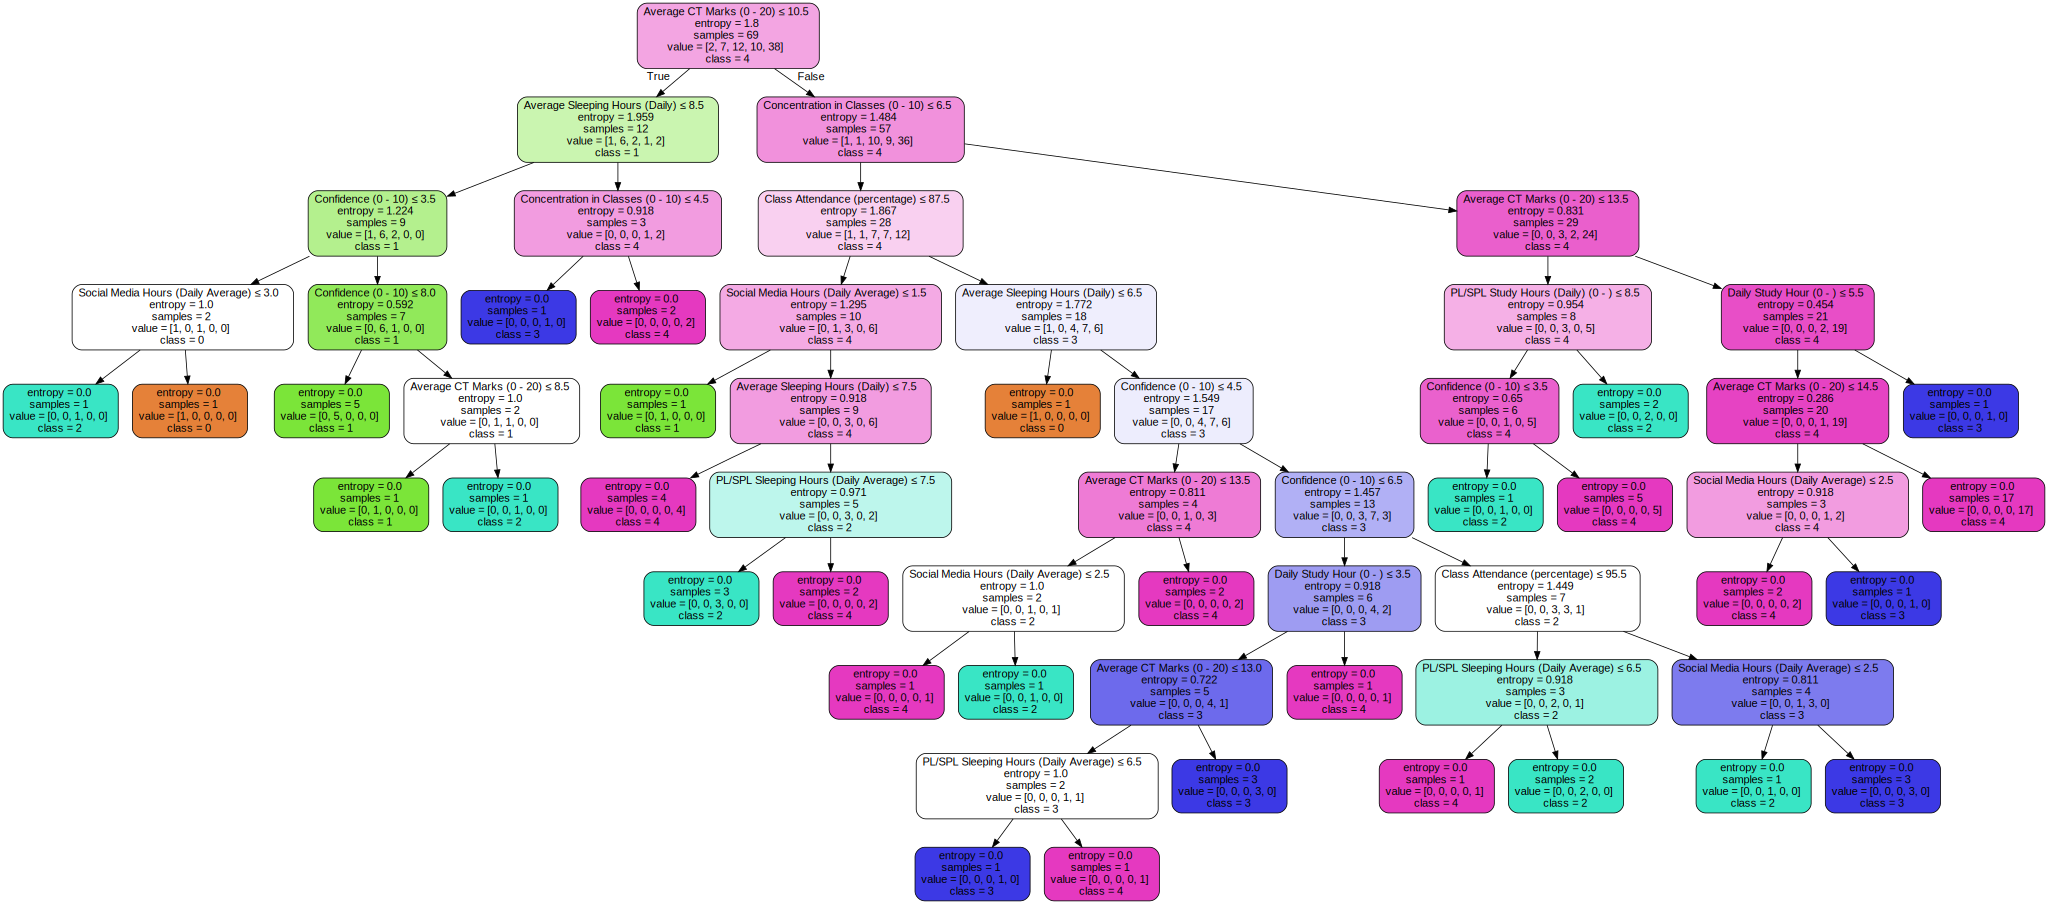

In [53]:
import graphviz 
dot_data = tree.export_graphviz(DT, out_file=None, 
                      feature_names=feature_cols,  
                      class_names=['0','1','2','3','4','5','6'],  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

# **Hyper parameter tuning (Decision Tree)**

In [54]:
dt = DecisionTreeClassifier()

In [55]:
from sklearn.model_selection import GridSearchCV

param_dict = {
    "criterion":['gini','entropy'],
    "max_depth":range(1,10),
    "min_samples_split":range(1,10),
    "min_samples_leaf":range(1,5)
}

In [56]:
#dictp={'i':0,'accuracy':0}

#for i in range(101):
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=25)
grid = GridSearchCV(dt, param_grid=param_dict, cv=10, verbose = 1,n_jobs=-1)
grid.fit(X_train, y_train)
#print(grid.best_params_) 
#print(grid.best_estimator_)
grid_predictions = grid.predict(X_test) 
#print(classification_report(y_test, grid_predictions)) 
acu = accuracy_score(y_test,grid_predictions)*100
#   if dictp['accuracy']<acu:
#       dictp['accuracy']=acu
#       dictp['i']=i
#print("i : ",dictp['i']," accuracy : ",dictp['accuracy'])

Fitting 10 folds for each of 648 candidates, totalling 6480 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
720 fits failed out of a total of 6480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
720 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 942, in fit
    X_idx_sorted=X_idx_sorted,
  F

In [57]:
from sklearn.metrics import classification_report, confusion_matrix 
print(grid.best_params_) 
print(classification_report(y_test, grid_predictions))

{'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         1
           6       0.81      0.93      0.87        14

    accuracy                           0.72        18
   macro avg       0.20      0.23      0.22        18
weighted avg       0.63      0.72      0.67        18



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1

In [58]:
#print("i : ",dictp['i']," accuracy : ",dictp['accuracy'])

# **KNN**

In [59]:
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=25)
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [60]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
KNN = KNeighborsClassifier()
#KNN.fit(X_train, y_train)
mean_acc = np.zeros(20)
for i in range(1,21):
    #Train Model and Predict  
    knn = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    yhat= knn.predict(X_test)
    mean_acc[i-1] = metrics.accuracy_score(y_test, yhat)

mean_acc

array([0.44444444, 0.22222222, 0.38888889, 0.5       , 0.38888889,
       0.5       , 0.5       , 0.61111111, 0.77777778, 0.77777778,
       0.77777778, 0.66666667, 0.72222222, 0.72222222, 0.77777778,
       0.72222222, 0.72222222, 0.77777778, 0.72222222, 0.72222222])

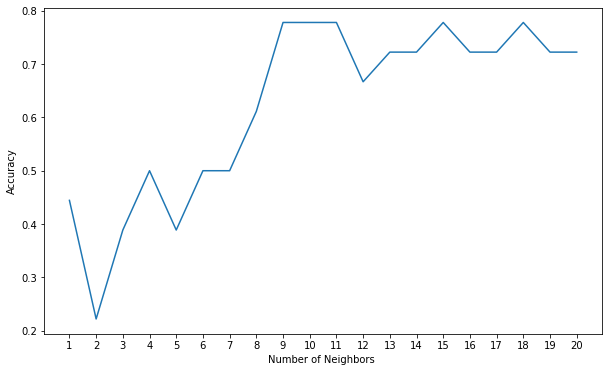

In [61]:
loc = np.arange(1,21,step=1.0)
plt.figure(figsize = (10, 6))
plt.plot(range(1,21), mean_acc)
plt.xticks(loc)
plt.xlabel('Number of Neighbors ')
plt.ylabel('Accuracy')
plt.show()

In [62]:
grid_params = { 'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

In [63]:
gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv=3, n_jobs = -1)
# fit the model on our train set
g_res = gs.fit(X_train, y_train)
# get the hyperparameters with the best score
g_res.best_params_

Fitting 3 folds for each of 36 candidates, totalling 108 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  UserWarning,


{'metric': 'minkowski', 'n_neighbors': 11, 'weights': 'distance'}

In [64]:
# use the best hyperparameters
knn = KNeighborsClassifier(n_neighbors = 11, weights = 'distance',algorithm = 'brute',metric = 'minkowski')
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='brute', n_neighbors=11, weights='distance')

In [65]:
# get a prediction
y_hat = knn.predict(X_train)
y_knn = knn.predict(X_test)

In [66]:
print('Training set accuracy: ', metrics.accuracy_score(y_train, y_hat))
print('Test set accuracy: ',metrics.accuracy_score(y_test, y_knn))

Training set accuracy:  1.0
Test set accuracy:  0.7777777777777778


In [67]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
    print(np.mean(pred_i != y_test))

0.5555555555555556
0.7777777777777778
0.6111111111111112
0.5
0.6111111111111112
0.5
0.5
0.3888888888888889
0.2222222222222222
0.2222222222222222
0.2222222222222222
0.3333333333333333
0.2777777777777778
0.2777777777777778
0.2222222222222222
0.2777777777777778
0.2777777777777778
0.2222222222222222
0.2777777777777778
0.2777777777777778
0.2777777777777778
0.2777777777777778
0.2777777777777778
0.2777777777777778
0.2777777777777778
0.2777777777777778
0.3333333333333333
0.3333333333333333
0.2777777777777778
0.2222222222222222
0.2222222222222222
0.2222222222222222
0.2222222222222222
0.2222222222222222
0.2222222222222222
0.2222222222222222
0.2222222222222222
0.2222222222222222
0.2222222222222222


Text(0, 0.5, 'Mean Error')

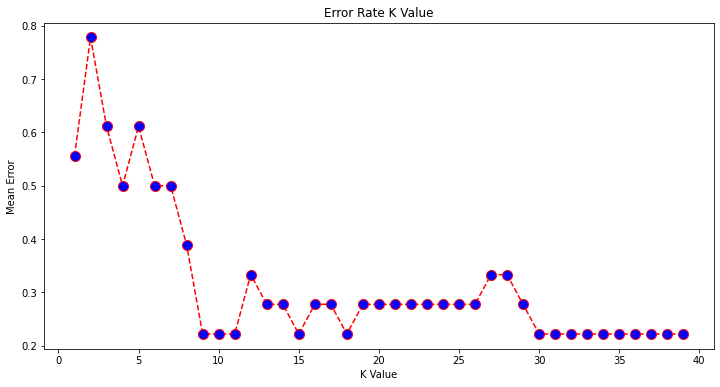

In [68]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

# **Ensemble Technique**

In [69]:
from sklearn.ensemble import GradientBoostingClassifier
model= GradientBoostingClassifier(learning_rate=0.01,random_state=1)
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.8333333333333334